In [33]:
# Initial imports
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score , mean_squared_error, r2_score

import psycopg2
import matplotlib. pyplot as plt 
import seaborn as sns

from config import password

In [34]:
# Load the pga data set dataset from database 
connection_string = f"host=red-team-final.c3yshvuxvm9x.us-east-2.rds.amazonaws.com dbname=red-team port=5432 user=postgres password={password}"
connection = psycopg2.connect(connection_string)

In [35]:
# Establish connection and db
sql = "select * from pga_stats"
pga_df = pd.read_sql(sql, connection)

In [36]:
# Show df
pga_df = pga_df.rename(columns={"money_MONEY":"Winnings"})
pga_df

,SG_off_tee_AVERAGE,SG_tee_green_AVERAGE,driving_dist_AVG.,pct_ydg_tee_AVG (%),driving_320+_%,SG_approach_green_AVERAGE,GIR_pct_%,GOFIR_pct_%,GIR_pct_fwy_%,GIR_pct_not_fwy_%,...,pct_sand_save_%,scrambling_%,SG_putt_AVERAGE,pct_one_putt_%,pct_three_putt_avoid_%,putt_avg_AVG,putts_per_rd_AVG,bogey_avoid_% MAKES BOGEY,btb_ratio_BIRDIE TO BOGEY RATIO,Winnings
0,1.144,2.099,321.1,66.80,51.47,0.696,66.67,80.34,80.87,50.25,...,48.89,61.27,0.435,41.01,3.27,1.752,28.74,14.54,1.84,5443091
1,0.841,1.700,307.1,64.01,29.17,0.582,72.11,85.90,83.80,57.32,...,50.00,63.07,-0.019,38.43,2.55,1.750,29.04,14.00,1.79,3556232
2,0.774,1.064,318.2,64.96,48.68,0.178,65.35,74.37,79.47,53.10,...,57.35,57.81,0.040,42.11,3.36,1.743,28.76,17.11,1.48,1782342
3,0.610,0.833,299.9,63.64,13.28,0.553,73.18,79.81,80.52,65.29,...,46.05,61.49,-0.013,37.67,2.52,1.756,29.30,12.50,1.91,1482028
4,0.567,0.563,287.4,60.36,8.33,-0.088,64.81,68.25,72.54,51.09,...,52.50,60.53,-0.793,39.12,2.78,1.779,29.25,15.74,1.15,164271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,-0.063,0.284,300.9,63.32,16.67,0.585,66.43,73.44,76.26,54.23,...,56.10,58.99,-0.113,36.55,3.22,1.807,29.45,16.26,1.17,824162
461,-0.417,-0.168,278.7,60.89,1.92,-0.006,63.53,68.20,73.63,48.14,...,54.17,62.30,0.451,42.02,1.42,1.748,28.32,15.03,1.27,942372
462,0.022,-0.402,285.1,62.05,1.69,-0.429,64.69,69.61,77.00,52.37,...,51.35,58.67,-0.006,38.51,2.73,1.779,29.15,16.95,1.14,332352
463,0.255,0.325,296.4,63.35,13.27,0.251,66.07,71.07,76.71,51.13,...,51.45,56.98,0.154,38.78,3.05,1.772,29.08,17.05,1.24,1943309


In [37]:
# Define the features and exclude winnings 
X = pga_df.drop(columns=["Winnings", "bogey_avoid_% MAKES BOGEY", "btb_ratio_BIRDIE TO BOGEY RATIO", "SG_tee_green_AVERAGE"], axis=1)
X

,SG_off_tee_AVERAGE,driving_dist_AVG.,pct_ydg_tee_AVG (%),driving_320+_%,SG_approach_green_AVERAGE,GIR_pct_%,GOFIR_pct_%,GIR_pct_fwy_%,GIR_pct_not_fwy_%,fwy_prox_AVG,rough_prox_AVG,SG_ATG_AVERAGE,pct_sand_save_%,scrambling_%,SG_putt_AVERAGE,pct_one_putt_%,pct_three_putt_avoid_%,putt_avg_AVG,putts_per_rd_AVG
0,1.144,321.1,66.80,51.47,0.696,66.67,80.34,80.87,50.25,374,572,0.259,48.89,61.27,0.435,41.01,3.27,1.752,28.74
1,0.841,307.1,64.01,29.17,0.582,72.11,85.90,83.80,57.32,372,612,0.326,50.00,63.07,-0.019,38.43,2.55,1.750,29.04
2,0.774,318.2,64.96,48.68,0.178,65.35,74.37,79.47,53.10,385,583,0.112,57.35,57.81,0.040,42.11,3.36,1.743,28.76
3,0.610,299.9,63.64,13.28,0.553,73.18,79.81,80.52,65.29,347,491,-0.329,46.05,61.49,-0.013,37.67,2.52,1.756,29.30
4,0.567,287.4,60.36,8.33,-0.088,64.81,68.25,72.54,51.09,387,543,0.084,52.50,60.53,-0.793,39.12,2.78,1.779,29.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,-0.063,300.9,63.32,16.67,0.585,66.43,73.44,76.26,54.23,345,481,-0.238,56.10,58.99,-0.113,36.55,3.22,1.807,29.45
461,-0.417,278.7,60.89,1.92,-0.006,63.53,68.20,73.63,48.14,373,544,0.254,54.17,62.30,0.451,42.02,1.42,1.748,28.32
462,0.022,285.1,62.05,1.69,-0.429,64.69,69.61,77.00,52.37,399,539,0.006,51.35,58.67,-0.006,38.51,2.73,1.779,29.15
463,0.255,296.4,63.35,13.27,0.251,66.07,71.07,76.71,51.13,381,540,-0.182,51.45,56.98,0.154,38.78,3.05,1.772,29.08


In [38]:
# Define the target set as Winnings
y = pga_df[["Winnings"]]
y.head()

,Winnings
0,5443091
1,3556232
2,1782342
3,1482028
4,164271


<AxesSubplot:title={'center':'Correlation Matrix'}>

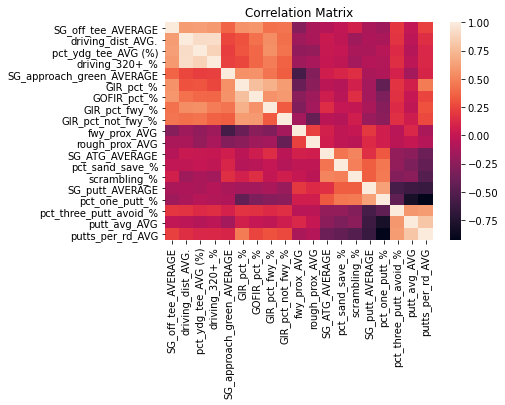

In [39]:
# Show correlation matrix (removing features did not result in performance gain)
heatmap = X.corr(method="pearson")
plt.title("Correlation Matrix")
sns.heatmap(heatmap)

In [40]:
# Prep data for ML model
# y = values we want to predict
y = np.array(pga_df["Winnings"])

# Save list to use later
feature_list = list(X.columns)

# Convert to numpy array
X = np.array(X)

In [41]:
# Split Data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

print("--------------------------")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("--------------------------")
print("y_train mean:", round(np.mean(y_train),2))
print("--------------------------")
print("y_test mean:", round(np.mean(y_test),2))
print("--------------------------")

--------------------------
X_train shape: (279, 19)
X_test shape: (186, 19)
--------------------------
y_train mean: 2031798.72
--------------------------
y_test mean: 2066862.04
--------------------------


In [42]:
# # Create a scaler instance (scaling did not result in r2 score gains)
# scaler = StandardScaler()

# # Fit
# X_scaler = scaler.fit(X_train)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [43]:
# Call Regression model
model = RandomForestRegressor(n_estimators=1000)

# Train data to model
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [44]:
# Predict
y_pred = model.predict(X_test)

In [45]:
# Show explained variance
explained_variance_score(y_test, y_pred)

0.6210155397345642

In [46]:
# Evaluate performance
# MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {round(mse,2)}')

rmse = np.sqrt(mse)
print(f'RMSE: {round(rmse,2)}')

# Coefficient of Determination (should match explained variance)
print(f'Coefficient of Determination: {round(r2_score(y_test, y_pred),2)}')

# Calculate the absolute errors
error = abs(y_pred - y_test)

# Print mean absolute error
print(f'Mean Absolute Error: {round(np.mean(error),2)}')

Mean squared error: 1219698021600.93
RMSE: 1104399.39
Coefficient of Determination: 0.62
Mean Absolute Error: 826213.06


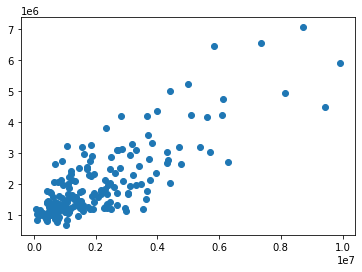

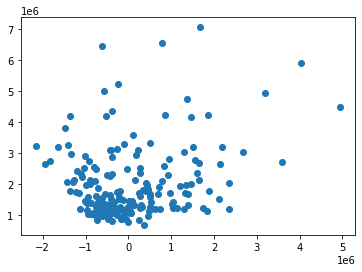

In [47]:
# Plot predicted vs true and residuals vs predicted
residuals = y_test - y_pred
plt.scatter(y_test,y_pred)
plt.show()

residuals = y_test - y_pred
plt.scatter(residuals,y_pred)
plt.show()

In [48]:
# Amended code from towarddatascience
# Feature importances
importances = list(model.feature_importances_)

feature_importances = [(f, round(i, 2)) for f, i in zip(feature_list, importances)]

# Sort the feature importances 
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print features and importances 
[print('{:20} Importance: {}'.format(*i)) for i in feature_importances];

SG_approach_green_AVERAGE Importance: 0.2
pct_ydg_tee_AVG (%)  Importance: 0.16
SG_off_tee_AVERAGE   Importance: 0.13
SG_putt_AVERAGE      Importance: 0.09
putt_avg_AVG         Importance: 0.07
driving_320+_%       Importance: 0.04
fwy_prox_AVG         Importance: 0.04
driving_dist_AVG.    Importance: 0.03
SG_ATG_AVERAGE       Importance: 0.03
scrambling_%         Importance: 0.03
pct_one_putt_%       Importance: 0.03
GIR_pct_%            Importance: 0.02
GOFIR_pct_%          Importance: 0.02
GIR_pct_fwy_%        Importance: 0.02
GIR_pct_not_fwy_%    Importance: 0.02
rough_prox_AVG       Importance: 0.02
pct_sand_save_%      Importance: 0.02
pct_three_putt_avoid_% Importance: 0.02
putts_per_rd_AVG     Importance: 0.02
